<a href="https://colab.research.google.com/github/dpiresearch/ODSCWest2020_ReinforcementLearning/blob/main/03_Monte_Carlo_in_RL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Monte Carlo in RL

RL's goal is to find a policy that maximizes the agent's total reward.

In complex problems analytical solutions are too hard to compute, so an alternative approach is to sample our problem repeatedly.


### The MC method

To create one sample for an episodic problem we will need to create a full episode (not just one move) and then record the final outcome. The episode is create by sampling randomly the actions.

In MC methods we play an episode starting from a randim state, not necessarly the beginning, till the end of the game. After this we will receive some feedback, which is the reward of the episode.

To understand which action the agent should take we must have a way to redistribute the reawrd to each actionss according on how much the action contributed in earning the reward.

The simple MC approach is quite basic: for each episode every action will receive the full episode reward. The algorithm will then take the mean of all rewards received for each action. By sampling multiple times more useful actions will have an higher averge reward.

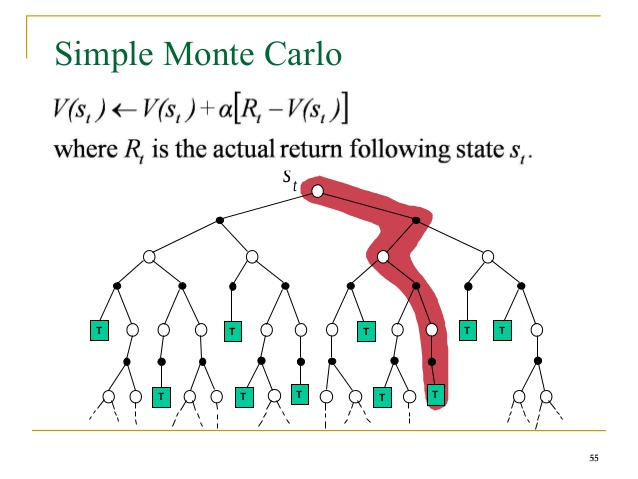

### In more details

While generating an episode we need to record the states, actions and rewards that we encountered are stored to compute the value function V(s) and Q-matrix Q(s) for each state we passed through. 

The q-matrix is an estimation 

We repeat this process many times and collect all states, actions, and rewards. We average the values of the discovered V(s) and Q(s).Because we need to wait until the game ends it can only be used in  episodic tasks.

The value function V(S) represent the estimation of the discounted future rewards that we will have from S till the end of the episode. The rewards will be discounted by a certain factor depending how far in the future they are. The value function is given by the policy, which is telling which action to take given that we are in state s, and the Q-matrix, which tells us given a certain state and a certain action what will be the discounted value of future rewards.

An advantage of this approach is that we explore our states quite well, as the algorithm can see till the end of the episode.

A big disadvantage is that it requires a lot of time to converge, and there is no guarantee that we will see all possible states. 

A strategy to avoid this is to use the Exploring Start technique, which start every episode at a different state/action pair.



## Excercise
### Task

Our agent needs to cross a frozen lake, represented by a square divided with a 4x4 grid. 

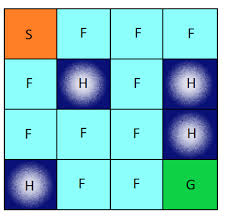

At every step it needs to take an action: up, down, left or right. If it's not possible to go to the chosen direction our agent will simply not move. 

Each grid element can be:
* Frozen, in that case our agent will be able to move,
* A hole, in that case the episodes end and we won't get the reward or it can be the final state,
* The goal, in that case the agent will receive a positive reward.

Note that the enviroment is not deterministic, sometimes we will 'slip' in a hole, ending the episode.


## Task
You will need to complete the code by adding a policy in the 'complete here' comment. You can start with a greedy policy and then eexplore more others.We will start with some parameters, and you will need to complete the Q matrix initialization with the right dimensions. We will start with defining ome variables and parameters. env = gym.make("FrozenLake-v0")


In [ ]:
import numpy as np
import gym
import matplotlib.pyplot as plt

num_episodes = 500000
epsilon = 0.2

env_name = 'FrozenLake-v0'

env = gym.make(env_name)


# simple function to improve code readability
def reset_episode(env):
    return env.reset(), False, [], 0.0


The policy in RL is like the set of rules that the agent must follow. A policy can be deterministic or stochastic. 

A simple deterministic policy is the greedy policy, which always pick the action with the highest immediate reward. If the information is stored in a list the greedy search would the argmax. That is not very useful in un uncertian enviroment as it does not explore.

### A MC method

Please complete the following MC method. Yout 


Success rate: 1.3% at 1000 iteration, tot reward: 13.0
Success rate: 1.7000000000000002% at 2000 iteration, tot reward: 34.0
Success rate: 2.2333333333333334% at 3000 iteration, tot reward: 67.0
Success rate: 2.325% at 4000 iteration, tot reward: 93.0
Success rate: 2.5% at 5000 iteration, tot reward: 125.0
Success rate: 2.8000000000000003% at 6000 iteration, tot reward: 168.0
Success rate: 3.3000000000000003% at 7000 iteration, tot reward: 231.0
Success rate: 3.85% at 8000 iteration, tot reward: 308.0
Success rate: 4.211111111111111% at 9000 iteration, tot reward: 379.0
Success rate: 4.92% at 10000 iteration, tot reward: 492.0
Success rate: 5.654545454545454% at 11000 iteration, tot reward: 622.0
Success rate: 6.358333333333334% at 12000 iteration, tot reward: 763.0
Success rate: 7.107692307692308% at 13000 iteration, tot reward: 924.0
Success rate: 7.957142857142857% at 14000 iteration, tot reward: 1114.0
Success rate: 8.82% at 15000 iteration, tot reward: 1323.0
Success rate: 9.775% 

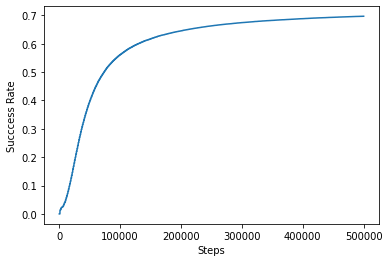

In [ ]:
# the Q matrix that stores the expected rewards
Q = np.zeros([env.observation_space.n, env.action_space.n])
# Q: why do we need this?
n_s_a = np.zeros([env.observation_space.n, env.action_space.n])  

r_list = []
success_rate = []
sr = 0
epsilon = 0.99
for i in range(num_episodes):
    state, done, results_list, result_sum = reset_episode(env)
    epsilon = epsilon * 0.9999

    while not # complete here:
        if Q[state,:].sum() == 0 or np.random.rand() < epsilon:
            action = # complete here
        else:
            action = # complete here
        new_state, reward, done, _ = # complete here
        results_list.append((state, action))
        result_sum += reward
        state = new_state
    r_list.append(result_sum)

    # At the end of the episode we update the Q matrix
    for (state, action) in results_list:
        n_s_a[state, action] += # complete here
        alpha = 1.0 / n_s_a[state, action] # we divide by the number of visits
        Q[state, action] += alpha * (result_sum - Q[state, action])

    # not important, just to show the results
    if i % 1000 == 0 and i is not 0:
        sr = sum(r_list)/i
        print(f'Success rate: {sr*100}% at {i} iteration, '
        f'tot reward: {sum(r_list)}')
    success_rate.append(sr)
        
plt.plot(success_rate)
plt.xlabel('Steps')
plt.ylabel('Succcess Rate')

print("Success rate: " + str(sum(r_list)/num_episodes))

env.close()